##Task 1: Exploring and Visualizing a Simple Dataset
###Objective:
Learn how to load, inspect, and visualize a dataset to understand data trends and distributions.
###Dataset:
Iris Dataset (CSV format, can be loaded via seaborn or downloaded)
###Instructions:
● Load the dataset using pandas.
● Print the shape, column names, and the first few rows using .head().
● Use .info() and .describe() for summary statistics.
● Visualize the dataset:
○ Create a scatter plot to show relationships between features.
○ Use histograms to show value distributions.

○ Use box plots to identify outliers.
● Use matplotlib and seaborn for plotting.

###Skills:
● Data loading and inspection using pandas
● Descriptive statistics and data exploration
● Basic plotting and visualization with seaborn and matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Iris dataset from a public URL

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=column_names)

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


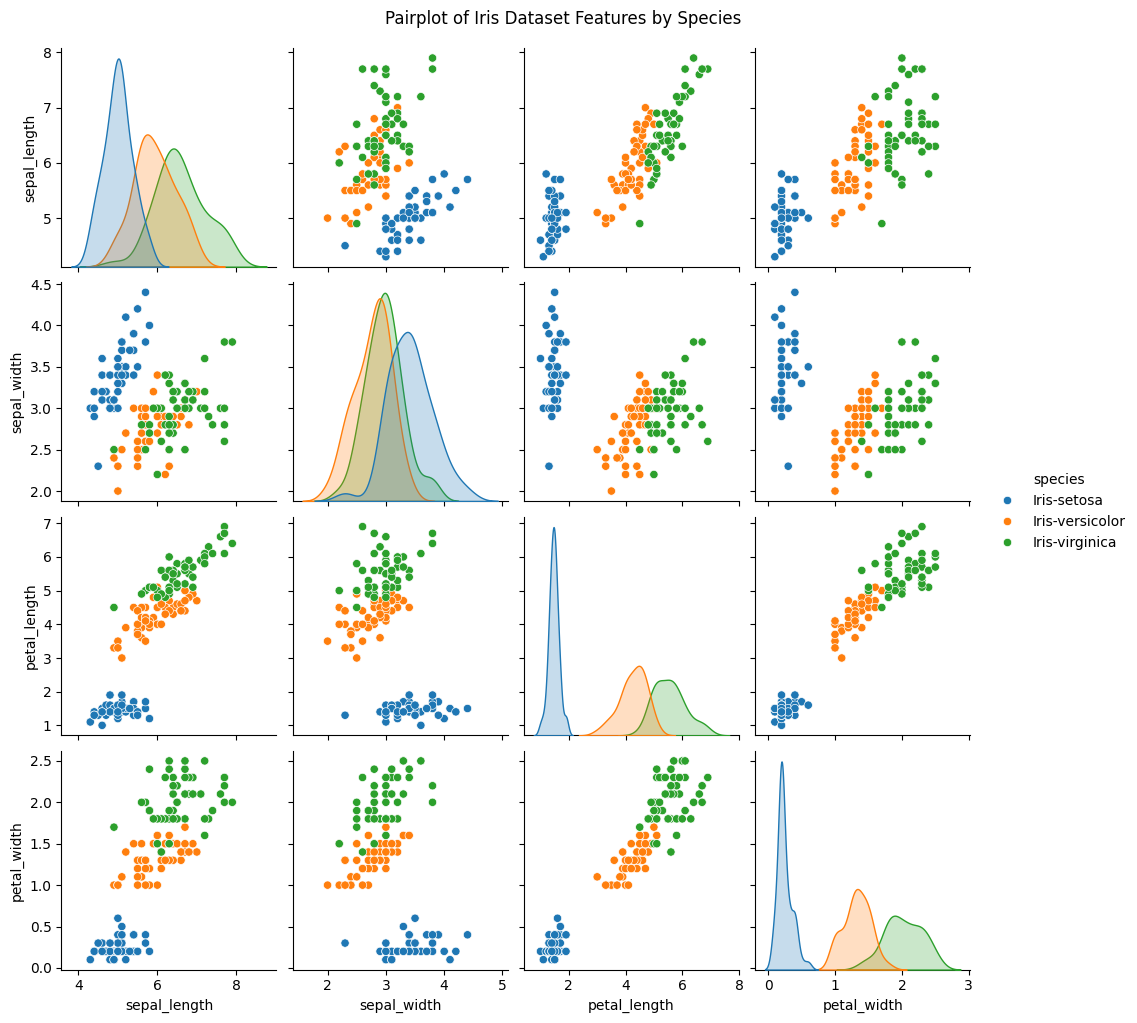

In [ ]:
# Create a scatter plot matrix (pairplot) to visualize relationships between all features
# 'hue' parameter will color the points based on the 'species' column
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset Features by Species', y=1.02) # Add a title above the subplots
plt.show()

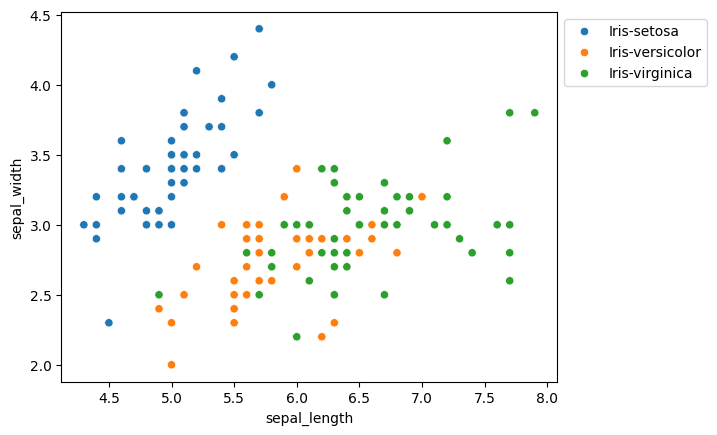

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=iris_df)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

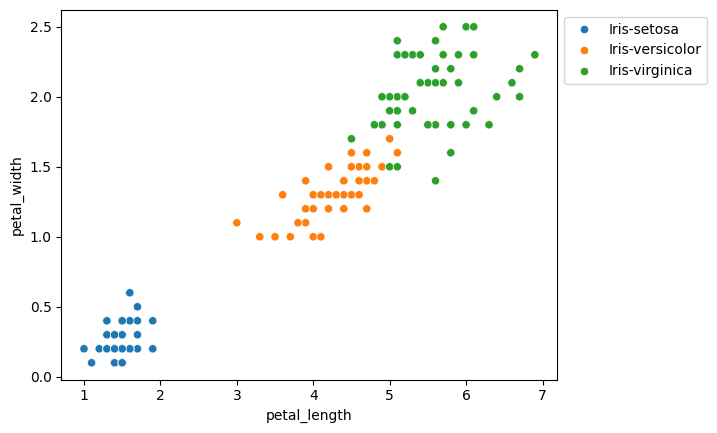

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='species', data=iris_df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

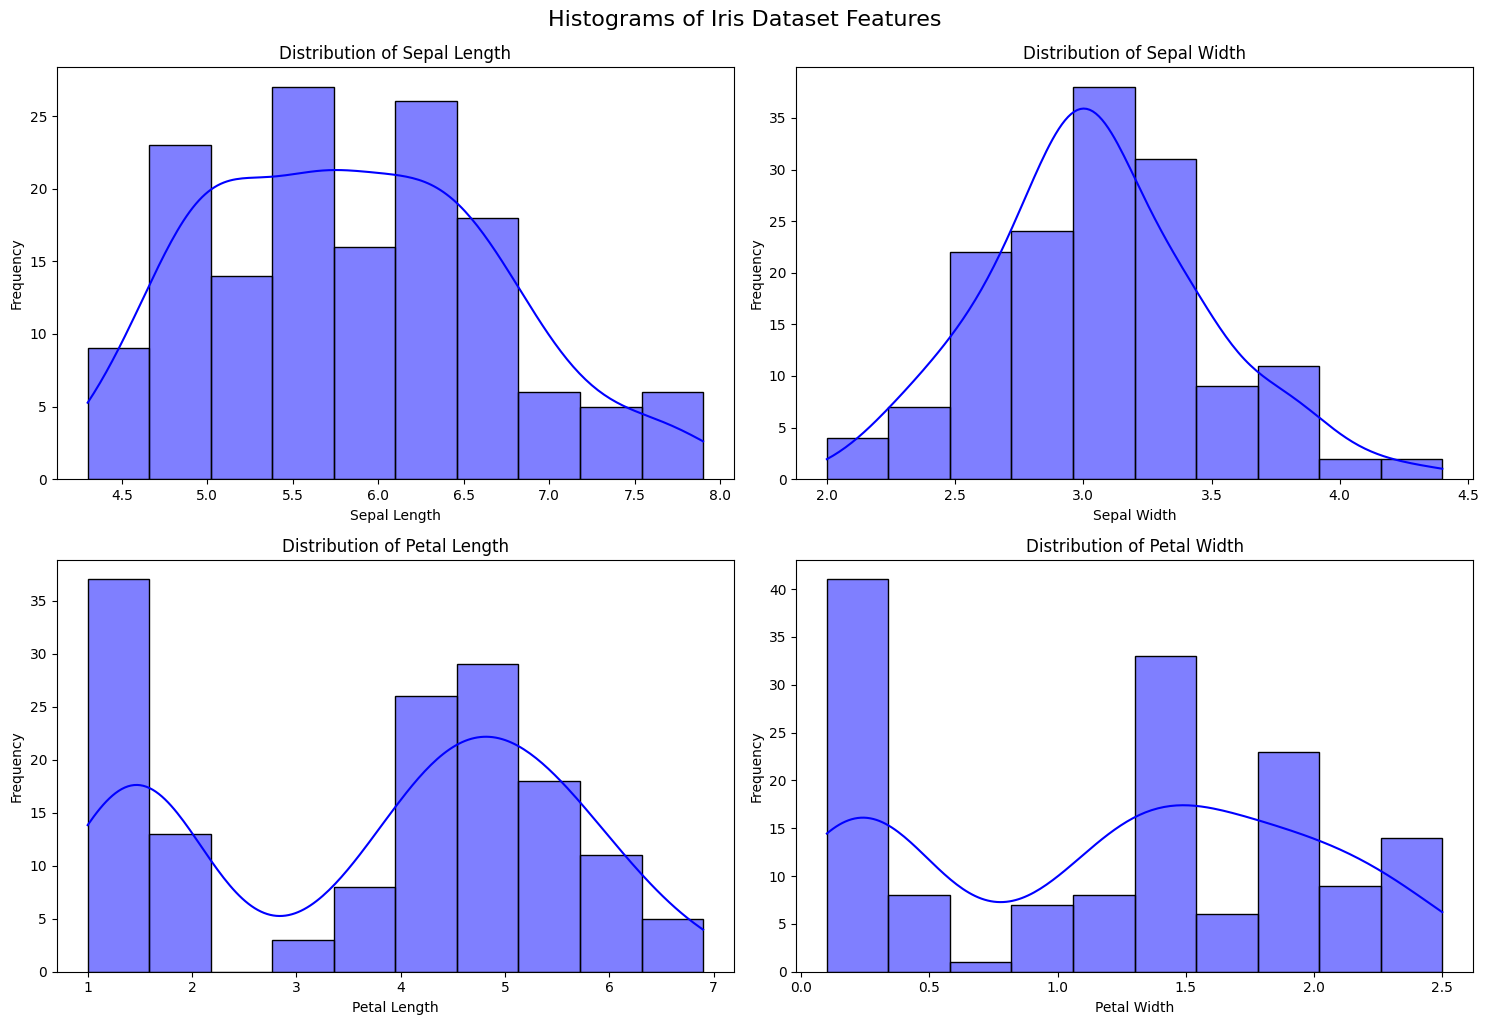

In [ ]:
# Generates histograms for each numerical feature in the Iris dataset.
# Histograms help visualize the distribution of values for each feature,

# Identify the numerical columns from the DataFrame to plot.
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set up the figure size for better readability of multiple plots.
plt.figure(figsize=(15, 10))

# Iterate through each numerical column to create a histogram.
for i, column in enumerate(numerical_columns):
    # Create a subplot for each histogram within a 2x2 grid.
    plt.subplot(2, 2, i + 1)

    # Generate the histogram using seaborn's histplot
    sns.histplot(iris_df[column], kde=True, bins=10, color='blue')

    # Set the title and labels for the current subplot.
    # .replace("_", " ").title() formats the column name nicely for display.
    plt.title(f'Distribution of {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Frequency')

# Adjust layout to prevent plot titles/labels from overlapping, ensuring readability.
plt.tight_layout()

# Add a main title for the entire set of histograms.
# y=1.02 slightly raises the title above the subplots.
plt.suptitle('Histograms of Iris Dataset Features', y=1.02, fontsize=16)

# Display the generated plots.
plt.show()

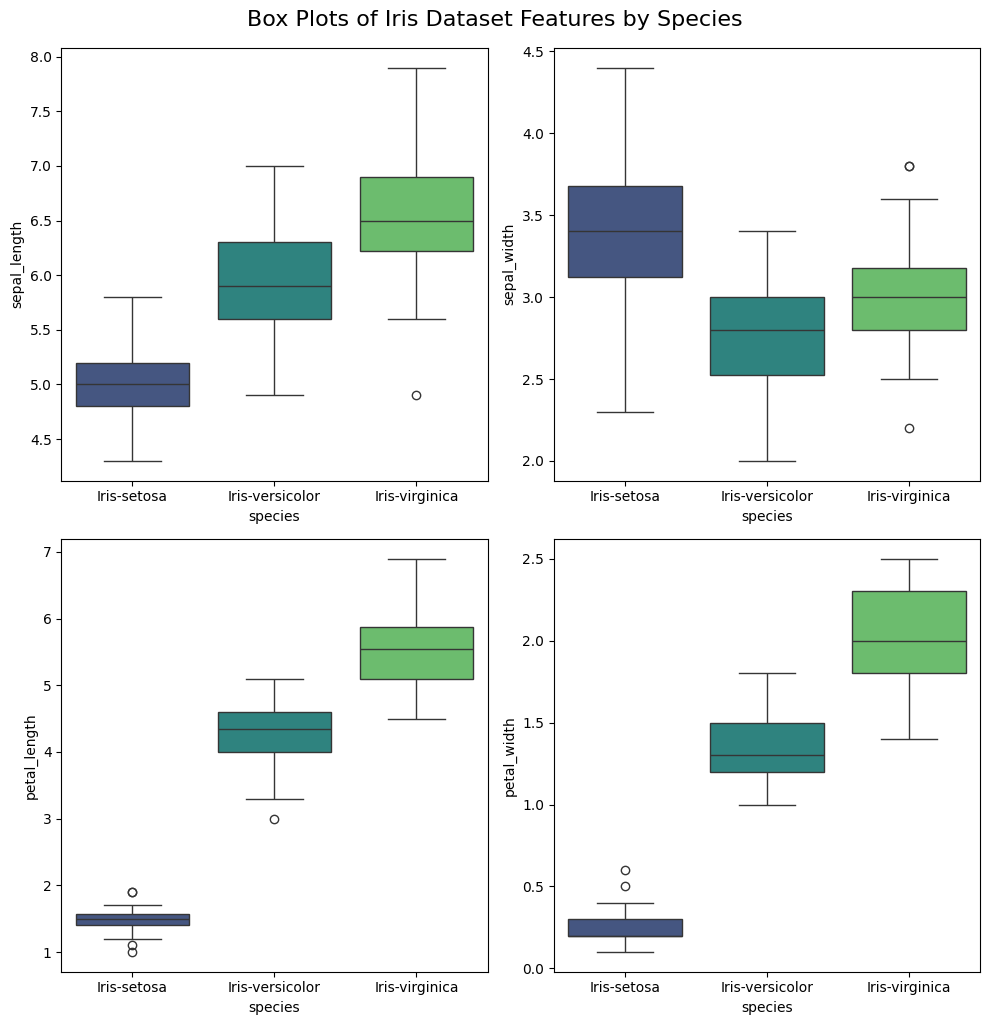

In [ ]:
def graph(y):
    # Display box plots for each species, with 'y' representing the feature.
    # Assigning 'species' to 'hue' and setting 'legend=False' makes each species get a distinct color
    # without creating a redundant legend, as 'species' is already on the x-axis.
    sns.boxplot(x="species", y=y, data=iris_df, hue="species", palette='viridis', legend=False)

plt.figure(figsize=(10,10))

# Create a 2x2 grid of subplots for the four features.
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Box Plots of Iris Dataset Features by Species', y=1.02, fontsize=16) # Main title
plt.show()

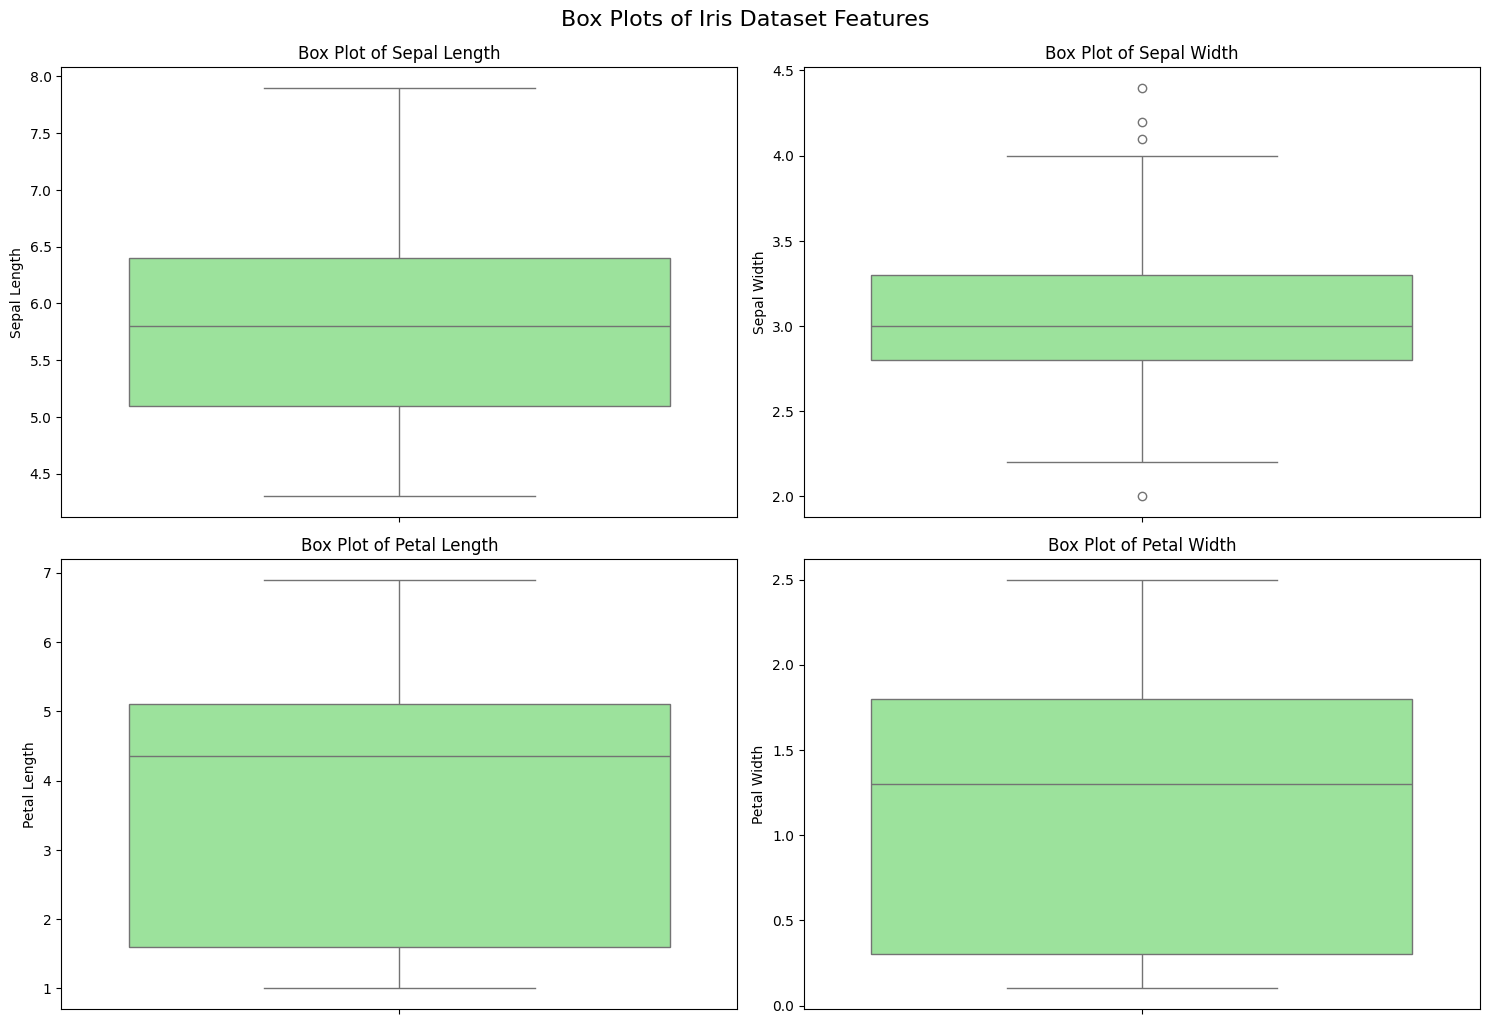

In [ ]:
# Generates box plots for each numerical feature in the Iris dataset.
# Box plots are useful for visualizing the distribution of numerical data
# and for identifying potential outliers (data points that fall outside the whiskers of the box plot).

# Get the numerical columns from the DataFrame that we want to plot.
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set up the figure size for better readability of multiple plots.
plt.figure(figsize=(15, 10))

# Iterate through each numerical column to create a box plot.
for i, column in enumerate(numerical_columns):
    # Create a subplot for each box plot within a 2x2 grid.
    # The arguments (2, 2, i + 1) mean 2 rows, 2 columns, and the current plot position (1-indexed).
    plt.subplot(2, 2, i + 1)

    # Generate the box plot using seaborn's boxplot.
    # y=iris_df[column] specifies the data to be plotted on the y-axis.
    # color='lightgreen' sets the color of the box plot.
    sns.boxplot(y=iris_df[column], color='lightgreen')

    # Set the title and label for the current subplot.
    # .replace("_", " ").title() formats the column name nicely for display.
    plt.title(f'Box Plot of {column.replace("_", " ").title()}')
    plt.ylabel(column.replace("_", " ").title())

# Adjust layout to prevent plot titles/labels from overlapping, ensuring readability.
plt.tight_layout()

# Add a main title for the entire set of box plots.
# y=1.02 slightly raises the title above the subplots.
plt.suptitle('Box Plots of Iris Dataset Features', y=1.02, fontsize=16)

# Display the generated plots.
plt.show()